# Step 3 ...

# DNA AI Researcher
# 26/3/2564 Edit 3

## 16 input && 2 output
## 24 Marker dataset
## show Major Name and Allele N0.

## Save output to Excel

In [1]:
import pathlib
import time
import openpyxl
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##conda install -c anaconda xlrd

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

##pip install git+https://github.com/tensorflow/docs

In [5]:
## Major Marker
columns_major_marker = ['Sample_Name', 'Marker']

## Input
columns_input = ['Allele_1', 'Allele_2', 'Allele_3', 'Allele_4',
                 'Allele_5', 'Allele_6', 'Allele_7', 'Allele_8',
                 'Height_1', 'Height_2', 'Height_3', 'Height_4',
                 'Height_5', 'Height_6', 'Height_7', 'Height_8']

## Output
columns_output = ['Out_1', 'Out_2']
# print(len(columns_input))
# print(len(columns_output))

In [6]:
header_name = []
header_name = columns_major_marker + columns_input + columns_output
print(header_name,"\n")
columns_names = []
columns_names = columns_input + columns_output
print(columns_names,"\n")

['Sample_Name', 'Marker', 'Allele_1', 'Allele_2', 'Allele_3', 'Allele_4', 'Allele_5', 'Allele_6', 'Allele_7', 'Allele_8', 'Height_1', 'Height_2', 'Height_3', 'Height_4', 'Height_5', 'Height_6', 'Height_7', 'Height_8', 'Out_1', 'Out_2'] 

['Allele_1', 'Allele_2', 'Allele_3', 'Allele_4', 'Allele_5', 'Allele_6', 'Allele_7', 'Allele_8', 'Height_1', 'Height_2', 'Height_3', 'Height_4', 'Height_5', 'Height_6', 'Height_7', 'Height_8', 'Out_1', 'Out_2'] 



## Read File

In [12]:
## File name and Path

# file_name = 'Filter_Mixure_major_2562'
file_name = 'Filted_Mixure_major_2563'
# file_name = 'Filter_Mixure_major_2563_+_2562'

#path_adress = ".\\งานวิจัย_นิติวิทยาศาสตร์\\DNA_Data\\"
#dataset_path = path_adress + file_name + '.xlsx'
dataset_path = file_name + '.xlsx'

In [13]:
theFile = openpyxl.load_workbook(dataset_path)
allSheetNames = theFile.sheetnames

print("All sheet names {} " .format(theFile.sheetnames))

All sheet names ['Sheet1'] 


In [14]:
sheet_n = 'Sheet1'

cols = 'c:t'
df = pd.read_excel(dataset_path, sheet_name=sheet_n, header=None,
                       skiprows=[0], usecols=cols, names=header_name)
df.head()
# df.head()
# df.tail()

,Allele_1,Allele_2,Allele_3,Allele_4,Allele_5,Allele_6,Allele_7,Allele_8,Height_1,Height_2,Height_3,Height_4,Height_5,Height_6,Height_7,Height_8,Out_1,Out_2
0,14,15,17.0,18.0,NaN,NaN,NaN,NaN,848.0,2528.0,2246.0,883.0,NaN,NaN,NaN,NaN,15,17
1,14,16,NaN,NaN,NaN,NaN,NaN,NaN,909.0,2979.0,NaN,NaN,NaN,NaN,NaN,NaN,16,16
2,11,12,NaN,NaN,NaN,NaN,NaN,NaN,1835.0,2602.0,NaN,NaN,NaN,NaN,NaN,NaN,11,12
3,8,10,11.0,NaN,NaN,NaN,NaN,NaN,1017.0,1324.0,1311.0,NaN,NaN,NaN,NaN,NaN,10,11
4,X,Y,NaN,NaN,NaN,NaN,NaN,NaN,4667.0,2155.0,NaN,NaN,NaN,NaN,NaN,NaN,X,Y


In [15]:
df = df.fillna(0) # แทนค่า nan = 0
df = df.replace('X', 80)
df = df.replace('Y', 100)

In [16]:
## Data Normalization

df['Allele_1'] = df['Allele_1']/100
df['Allele_2'] = df['Allele_2']/100
df['Allele_3'] = df['Allele_3']/100
df['Allele_4'] = df['Allele_4']/100
df['Allele_5'] = df['Allele_5']/100
df['Allele_6'] = df['Allele_6']/100
df['Allele_7'] = df['Allele_7']/100
df['Allele_8'] = df['Allele_8']/100

df['Height_1'] = df['Height_1']/10000
df['Height_2'] = df['Height_2']/10000
df['Height_3'] = df['Height_3']/10000
df['Height_4'] = df['Height_4']/10000
df['Height_5'] = df['Height_5']/10000
df['Height_6'] = df['Height_6']/10000
df['Height_7'] = df['Height_7']/10000
df['Height_8'] = df['Height_8']/10000

df['Out_1'] = df['Out_1']/100
df['Out_2'] = df['Out_2']/100

In [17]:
df.head()

,Allele_1,Allele_2,Allele_3,Allele_4,Allele_5,Allele_6,Allele_7,Allele_8,Height_1,Height_2,Height_3,Height_4,Height_5,Height_6,Height_7,Height_8,Out_1,Out_2
0,0.14,0.15,0.17,0.18,0.0,0.0,0.0,0.0,0.0848,0.2528,0.2246,0.0883,0.0,0.0,0.0,0.0,0.15,0.17
1,0.14,0.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0909,0.2979,0.0000,0.0000,0.0,0.0,0.0,0.0,0.16,0.16
2,0.11,0.12,0.00,0.00,0.0,0.0,0.0,0.0,0.1835,0.2602,0.0000,0.0000,0.0,0.0,0.0,0.0,0.11,0.12
3,0.08,0.10,0.11,0.00,0.0,0.0,0.0,0.0,0.1017,0.1324,0.1311,0.0000,0.0,0.0,0.0,0.0,0.10,0.11
4,0.80,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.4667,0.2155,0.0000,0.0000,0.0,0.0,0.0,0.0,0.80,1.00


In [12]:
# ## All

# major = 28 # sample
# marker_rows = 24
# marker_columns = 10+2

# lst_all = []
# num_columns = marker_columns # newcolumns
# lst_all = [0] * (major*marker_rows) # Generate Rows
# for i in range(len(lst_all)):
#     lst_all[i] = [0] * num_columns

# for k in range(0,major):
#     count = k * marker_rows
#     lst = []
#     df_temp = df_all[24*k:(24*k)+24]
#     array_temp = df_temp.to_numpy()
#     lst = array_temp.tolist()
#     del df_temp, array_temp
#     for i in range(0,marker_rows):
#         for j in range(0,marker_columns):
#             #lst_all[count][j] = lst[i][j]
#             if j < 4 :
#                 lst_all[count][j] = lst[i][j]/100
#             elif j >= 5 and j < 10:
#                 lst_all[count][j] = lst[i][j]/10000
#             elif j >= 10 and j < 12:
#                 lst_all[count][j] = lst[i][j]/100
#         count = count+1

In [13]:
# print(len(lst_all))     #rows
# print(len(lst_all[0]))  #columns
# print(len(lst_all[10]))  #columns

In [14]:
# dataset_all[0:605]

In [18]:
dataset_all = df.copy()

In [19]:
## แบ่งข้อมูลสำหรับทดสอบและฝึกสอน 80%  / 20%

dataset = dataset_all.copy()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [20]:
print(train_dataset.shape)
print(test_dataset.shape)

(1279, 18)
(320, 18)


In [21]:
print(columns_input,"\n")
print(columns_output,"\n")

['Allele_1', 'Allele_2', 'Allele_3', 'Allele_4', 'Allele_5', 'Allele_6', 'Allele_7', 'Allele_8', 'Height_1', 'Height_2', 'Height_3', 'Height_4', 'Height_5', 'Height_6', 'Height_7', 'Height_8'] 

['Out_1', 'Out_2'] 



In [22]:
# df.drop('column_name', 1)
train_data = train_dataset.drop(columns=columns_output)
train_labels = train_dataset.drop(columns=columns_input)

test_data = test_dataset.drop(columns=columns_output)
test_labels = test_dataset.drop(columns=columns_input)

In [23]:
len_test_data = len(test_data)
len_test_data

320

In [24]:
train_data
# df.head()
# df.tail()

,Allele_1,Allele_2,Allele_3,Allele_4,Allele_5,Allele_6,Allele_7,Allele_8,Height_1,Height_2,Height_3,Height_4,Height_5,Height_6,Height_7,Height_8
1109,0.12,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.1799,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
1032,0.20,0.240,0.000,0.000,0.0,0.0,0.0,0.0,0.0706,0.0892,0.0000,0.0000,0.0,0.0,0.0,0.0
1002,0.11,0.120,0.160,0.000,0.0,0.0,0.0,0.0,0.0179,0.0607,0.0742,0.0000,0.0,0.0,0.0,0.0
487,0.15,0.153,0.160,0.000,0.0,0.0,0.0,0.0,0.0231,0.1095,0.1477,0.0000,0.0,0.0,0.0,0.0
979,0.80,1.000,0.000,0.000,0.0,0.0,0.0,0.0,0.4922,0.3861,0.0000,0.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.14,0.180,0.190,0.000,0.0,0.0,0.0,0.0,0.1902,0.0245,0.1928,0.0000,0.0,0.0,0.0,0.0
932,0.14,0.150,0.000,0.000,0.0,0.0,0.0,0.0,0.1393,0.1136,0.0000,0.0000,0.0,0.0,0.0,0.0
732,0.11,0.130,0.140,0.000,0.0,0.0,0.0,0.0,0.2337,0.0291,0.2279,0.0000,0.0,0.0,0.0,0.0
715,0.30,0.302,0.312,0.322,0.0,0.0,0.0,0.0,0.1769,0.0702,0.1534,0.0566,0.0,0.0,0.0,0.0


In [25]:
train_data[1:5]

,Allele_1,Allele_2,Allele_3,Allele_4,Allele_5,Allele_6,Allele_7,Allele_8,Height_1,Height_2,Height_3,Height_4,Height_5,Height_6,Height_7,Height_8
1032,0.20,0.240,0.00,0.0,0.0,0.0,0.0,0.0,0.0706,0.0892,0.0000,0.0,0.0,0.0,0.0,0.0
1002,0.11,0.120,0.16,0.0,0.0,0.0,0.0,0.0,0.0179,0.0607,0.0742,0.0,0.0,0.0,0.0,0.0
487,0.15,0.153,0.16,0.0,0.0,0.0,0.0,0.0,0.0231,0.1095,0.1477,0.0,0.0,0.0,0.0,0.0
979,0.80,1.000,0.00,0.0,0.0,0.0,0.0,0.0,0.4922,0.3861,0.0000,0.0,0.0,0.0,0.0,0.0


In [26]:
train_data.tail()

,Allele_1,Allele_2,Allele_3,Allele_4,Allele_5,Allele_6,Allele_7,Allele_8,Height_1,Height_2,Height_3,Height_4,Height_5,Height_6,Height_7,Height_8
281,0.14,0.180,0.190,0.000,0.0,0.0,0.0,0.0,0.1902,0.0245,0.1928,0.0000,0.0,0.0,0.0,0.0
932,0.14,0.150,0.000,0.000,0.0,0.0,0.0,0.0,0.1393,0.1136,0.0000,0.0000,0.0,0.0,0.0,0.0
732,0.11,0.130,0.140,0.000,0.0,0.0,0.0,0.0,0.2337,0.0291,0.2279,0.0000,0.0,0.0,0.0,0.0
715,0.30,0.302,0.312,0.322,0.0,0.0,0.0,0.0,0.1769,0.0702,0.1534,0.0566,0.0,0.0,0.0,0.0
832,0.06,0.070,0.080,0.090,0.0,0.0,0.0,0.0,0.2065,0.2594,0.0842,0.0784,0.0,0.0,0.0,0.0


In [27]:
train_labels.head()

,Out_1,Out_2
1109,0.100,0.13
1032,0.200,0.24
1002,0.120,0.16
487,0.153,0.16
979,0.800,1.00


In [28]:
test_data[0:15]

,Allele_1,Allele_2,Allele_3,Allele_4,Allele_5,Allele_6,Allele_7,Allele_8,Height_1,Height_2,Height_3,Height_4,Height_5,Height_6,Height_7,Height_8
11,0.12,0.150,0.170,0.173,0.0,0.0,0.0,0.0,0.2000,0.0627,0.1523,0.0803,0.0,0.0,0.0,0.0
23,0.12,0.142,0.152,0.000,0.0,0.0,0.0,0.0,0.0968,0.3093,0.2960,0.0000,0.0,0.0,0.0,0.0
24,0.06,0.070,0.090,0.000,0.0,0.0,0.0,0.0,0.0345,0.1630,0.2740,0.0000,0.0,0.0,0.0,0.0
25,0.19,0.220,0.230,0.240,0.0,0.0,0.0,0.0,0.0987,0.0926,0.3285,0.3088,0.0,0.0,0.0,0.0
28,0.08,0.100,0.110,0.000,0.0,0.0,0.0,0.0,0.0940,0.0413,0.1441,0.0000,0.0,0.0,0.0,0.0
32,0.12,0.160,0.170,0.000,0.0,0.0,0.0,0.0,0.0829,0.0592,0.0792,0.0000,0.0,0.0,0.0,0.0
33,0.17,0.210,0.230,0.000,0.0,0.0,0.0,0.0,0.0544,0.0588,0.0194,0.0000,0.0,0.0,0.0,0.0
36,0.14,0.150,0.170,0.000,0.0,0.0,0.0,0.0,0.3802,0.2003,0.0348,0.0000,0.0,0.0,0.0,0.0
41,0.10,0.110,0.130,0.000,0.0,0.0,0.0,0.0,0.1282,0.5848,0.0696,0.0000,0.0,0.0,0.0,0.0
43,0.10,0.110,0.140,0.000,0.0,0.0,0.0,0.0,0.2538,0.0628,0.3114,0.0000,0.0,0.0,0.0,0.0


In [29]:
# test_labels.head()
(test_labels*100)[0:15]

,Out_1,Out_2
11,12.0,17.0
23,14.2,15.2
24,7.0,9.0
25,23.0,24.0
28,8.0,11.0
32,12.0,17.0
33,17.0,21.0
36,14.0,15.0
41,11.0,11.0
43,10.0,14.0


In [30]:
## สร้าง neural network โดยใข้  Library keras

def build_model():
    ## define the model ระยุโมเดล
    model = keras.Sequential([
        layers.Dense(2048, activation='relu', input_shape=[len(train_data.keys())]),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(2)
    ])
    
    ## define optimizer ระบุ optimizer
    # optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    ## สร้าง model และระบุ loss function แบบ mean square error
    model.compile(loss='mae',
                  optimizer=optimizer, 
                  metrics=['mae','mse'])
    return model

In [31]:
len(train_data.keys())

16

In [32]:
model = build_model() # สร้าง model

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              34816     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 2,921,474
Trainable params: 2,921,474
Non-trainable params: 0
_________________________________________________________________


In [34]:
example_result = model.predict(train_data[:5]) # ทดสอบดูว่า model เราสามารถทำงานได้
example_result

array([[ 0.00214697, -0.00121379],
       [ 0.00090803,  0.00289973],
       [ 0.000979  , -0.00149625],
       [ 0.00063795, -0.00166868],
       [ 0.00631677,  0.00666778]], dtype=float32)

In [35]:
## ทำการ training โมเดล โดยแบ่งข้อมูลสำหรับ test เป็น 10% จากชุดข้อมูล
EPOCHS = 500

tic = time.perf_counter()

history = model.fit(
    train_data, train_labels,
    epochs=EPOCHS, validation_split=0.1, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()])
    
toc = time.perf_counter()
print("\n",f"Time to train data for {EPOCHS} EPOCHS in {toc - tic:0.4f} seconds")


Epoch: 0, loss:0.0418,  mae:0.0418,  mse:0.0079,  val_loss:0.0194,  val_mae:0.0194,  val_mse:0.0010,  
....................................................................................................
Epoch: 100, loss:0.0090,  mae:0.0090,  mse:0.0008,  val_loss:0.0103,  val_mae:0.0103,  val_mse:0.0003,  
....................................................................................................
Epoch: 200, loss:0.0075,  mae:0.0075,  mse:0.0008,  val_loss:0.0079,  val_mae:0.0079,  val_mse:0.0002,  
....................................................................................................
Epoch: 300, loss:0.0065,  mae:0.0065,  mse:0.0007,  val_loss:0.0076,  val_mae:0.0076,  val_mse:0.0001,  
....................................................................................................
Epoch: 400, loss:0.0070,  mae:0.0070,  mse:0.0008,  val_loss:0.0076,  val_mae:0.0076,  val_mse:0.0001,  
........................................................................

In [36]:
## สร้าง Object plotter
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2) 

Text(0, 0.5, 'MAE [mpg]')

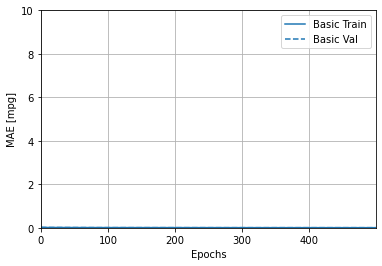

In [37]:
## plot ดูผล accuracy ของ training
plotter.plot({'Basic':history}, metric = 'mae')
plt.ylim([0,10])
plt.ylabel('MAE [mpg]')

Text(0, 0.5, 'MSE [mpg]')

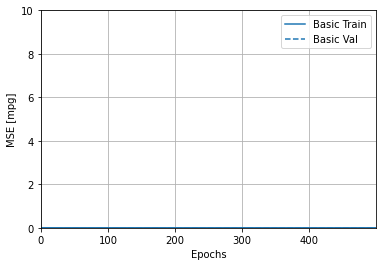

In [38]:
## plot ดูผล Mean square error ของ training
plotter.plot({'Basic':history}, metric = 'mse')
plt.ylim([0,10])
plt.ylabel('MSE [mpg]')

In [39]:
## ประเมิน โดยการทดสอบกับข้อมูลที่มันไม่เคยเห็น
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=2) 

print("Testing set Mean Abs Error: {:5.2f} mpg".format(mae))

10/10 - 0s - loss: 0.0093 - mae: 0.0093 - mse: 4.5479e-04
Testing set Mean Abs Error:  0.01 mpg


In [40]:
## run ข้อมูล prediction จาก model ที่ train แล้ว 
test_predictions = model.predict(test_data)
# test_predictions = test_predictions.flatten() # flatten ให้เป็น array 1 มิติ
# test_predictions*100
# type(test_predictions)

In [44]:
## Prepare Data Before Compare with Input
predictions_data = test_predictions*100
array_test_data = (test_data*100).to_numpy()

#print(type(array_test_data))
#print(type(predictions_data))


In [45]:
## compare with Input
Perd_labels = np.zeros((len(test_data), 2))
Perd_Allele = np.zeros((len(test_data), 2))

for k in range(0,len(array_test_data)):
    for i in range(0,2):
        c = np.array([99])
        c_new = np.array([0])
        for j in range(0,5):
            c_new = abs(predictions_data[k, i] - array_test_data[k, j])
            #print(c_new)
            if c_new < c:
                Perd_labels[k, i] = array_test_data[k, j]
                h = j
                Perd_Allele[k, i] = h + 1
                c = c_new

In [40]:
# Perd_labels

In [41]:
# Perd_Allele

In [46]:
predictions_data = pd.DataFrame({'Pred_Out_1': Perd_labels[:, 0], 'Pred_Out_2': Perd_labels[:, 1]})
predictions_data[0:15]

,Pred_Out_1,Pred_Out_2
0,12.0,17.3
1,14.2,15.2
2,7.0,9.0
3,24.0,24.0
4,8.0,11.0
5,12.0,17.0
6,17.0,21.0
7,14.0,15.0
8,11.0,11.0
9,10.0,14.0


In [47]:
predictions_data = predictions_data.replace(80, 'X')
predictions_data = predictions_data.replace(100, 'Y')

In [48]:
predictions_Allele = pd.DataFrame({'Pred_Allele_Out1': Perd_Allele[:, 0], 'Pred_Allele_Out2': Perd_Allele[:, 1]})
predictions_Allele[0:15]

,Pred_Allele_Out1,Pred_Allele_Out2
0,1.0,4.0
1,2.0,3.0
2,2.0,3.0
3,4.0,4.0
4,1.0,3.0
5,1.0,3.0
6,1.0,2.0
7,1.0,2.0
8,2.0,2.0
9,1.0,3.0


In [49]:
# test_labels*100
array_test_labels = (test_labels*100).to_numpy()
# array_test_labels

In [50]:
## เปรียบเทียบกับค่าที่ไม่เคยสอน
len_test_data = len(test_data)

count_0_out = 0
count_1_out = 0
count_2_out = 0

for k in range(0,len_test_data):
    for i in range(0,2):
        chk_1 = array_test_labels[k, 0] - Perd_labels[k, 0]
        chk_2 = array_test_labels[k, 1] - Perd_labels[k, 1]
    if chk_1 == 0 and chk_2 == 0:
         count_2_out = count_2_out + 1
    if chk_1 == 0 or chk_2 == 0:
         count_1_out = count_1_out + 1
    if not(chk_1 == 0 or chk_2 == 0):
         count_0_out = count_0_out + 1

print("Predictions 2 Out :", count_2_out)
print("Predictions 2 Out :", (count_2_out/len_test_data)*100, "%")
print("Predictions 1 Out :",count_1_out-count_2_out)
print("Predictions 1 Out :", ((count_1_out-count_2_out)/len_test_data)*100, "%")
print("Predictions 0 Out :",count_0_out)
print("Predictions 0 Out :", (count_0_out/len_test_data)*100, "%")

Predictions 2 Out : 208
Predictions 2 Out : 65.0 %
Predictions 1 Out : 62
Predictions 1 Out : 19.375 %
Predictions 0 Out : 50
Predictions 0 Out : 15.625 %


In [51]:
columns_Result = ['Pred_2_Out', 'Pred_2_Out(%)', 'Pred_1_Out','Pred_1_Out(%)','Pred_0_Out','Pred_0_Out(%)']
data_Result = np.array([[count_2_out, (count_2_out/len_test_data)*100, 
                         count_1_out-count_2_out, ((count_1_out-count_2_out)/len_test_data)*100, 
                         count_0_out, (count_0_out/len_test_data)*100]])
Pred_Result = pd.DataFrame(data_Result,columns=columns_Result)
Pred_Result

,Pred_2_Out,Pred_2_Out(%),Pred_1_Out,Pred_1_Out(%),Pred_0_Out,Pred_0_Out(%)
0,208.0,65.0,62.0,19.375,50.0,15.625


##  Read file

In [48]:
print(f"Current file name is {file_name}","\n")
print(f"Current path adress is {path_adress}","\n")

Current file name is Filter_Mixure_major_2563 

Current path adress is .\งานวิจัย_นิติวิทยาศาสตร์\DNA_Data\ 



In [49]:
columns_names = []
columns_names = columns_major_marker + columns_input + columns_output

sheet = 'Sheet1'
cols = 'a:t'
df_test_data = pd.read_excel(dataset_path, sheet_name=sheet, 
                             header=None, skiprows=[0], usecols=cols, names=columns_names)

## ค้นหาแถว
rows_test_data = list(test_data.index.values)
# rows_test_data

## เอาแถวไปเลือกข้อมูลในตาราง
df_test_data = df_test_data.iloc[rows_test_data]
# df_test_data

## Save Output  Excel

In [50]:
# file_name_save = 'Out_Mixmajor_2563_Edit_20210512_NO1'

Day = '20210513'
Number = '01'

file_name_save = 'Out_' + file_name + '_D' + Day + '_N' + Number
path_adress_save = ".\\งานวิจัย_นิติวิทยาศาสตร์\\Output_Excel_file\\"

directory = file_name_save
path_newfolder_save = os.path.join(path_adress_save, directory)
try: 
    os.mkdir(path_newfolder_save) 
except OSError as error: 
    print(error)  
# print("Directory '% s' created" % directory)

path_adress_save = path_adress_save + directory + "\\"
filepath_save = path_adress_save + file_name_save  + '.xlsx'
print(filepath_save)

[WinError 183] Cannot create a file when that file already exists: '.\\งานวิจัย_นิติวิทยาศาสตร์\\Output_Excel_file\\Out_Filter_Mixure_major_2563_D20210513_N01'
.\งานวิจัย_นิติวิทยาศาสตร์\Output_Excel_file\Out_Filter_Mixure_major_2563_D20210513_N01\Out_Filter_Mixure_major_2563_D20210513_N01.xlsx


In [51]:
## save model.summary() to .txt

from contextlib import redirect_stdout

filepath_save_txt = path_adress_save + 'Model_Summary_' + file_name_save + '.txt'
with open(filepath_save_txt, 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [52]:
## save Program name

prog_name = 'Program_name.txt'
filepath_save_txt = path_adress_save + prog_name
f = open(filepath_save_txt, "w")
f.write("*****Mixture_major_2563_Regression28x24sample_ed03*****")
f.close()

In [53]:
training_head = ['EPOCHS', 'Time(sec)',]
training_data = np.array([[EPOCHS, toc-tic, ]])
training_data = pd.DataFrame(training_data,columns=training_head)
training_data

,EPOCHS,Time(sec)
0,500.0,609.066312


In [54]:
# filepath = 'Out_Mix_major_14042021_No01.xlsx'
writer = pd.ExcelWriter(filepath_save)
df_test_data.to_excel(writer, 'Result', index=False, startcol=0)
predictions_data.to_excel(writer, 'Result', index=False, startcol=21)
predictions_Allele.to_excel(writer, 'Result', index=False, startcol=24)
Pred_Result.to_excel(writer, 'Percentage', index=False, startcol=0)
training_data.to_excel(writer, 'Training_data', index=False, startcol=0)
writer.save()

# Predict full Data

In [55]:
## Current file name and file path
print(f"Current file name is {file_name}","\n")
print(f"Current path adress is {path_adress}","\n")

Current file name is Filter_Mixure_major_2563 

Current path adress is .\งานวิจัย_นิติวิทยาศาสตร์\DNA_Data\ 



In [56]:
print(f"columns_major_marker is {columns_major_marker}","\n")
print(f"columns_input is {columns_input}","\n")
print(f"columns_output is {columns_output}","\n")

columns_major_marker is ['Sample_Name', 'Marker'] 

columns_input is ['Allele_1', 'Allele_2', 'Allele_3', 'Allele_4', 'Allele_5', 'Allele_6', 'Allele_7', 'Allele_8', 'Height_1', 'Height_2', 'Height_3', 'Height_4', 'Height_5', 'Height_6', 'Height_7', 'Height_8'] 

columns_output is ['Out_1', 'Out_2'] 



In [57]:
## copy file จาก dataset ที่ normalize มาแล้ว
df_filted_dataset = dataset_all.copy()
df_filted_data = df_filted_dataset.drop(columns=columns_output)
df_filted_labels = df_filted_dataset.drop(columns=columns_input)
print("df_filted_dataset :", df_filted_dataset.shape)
print("df_filted_data :", df_filted_data.shape)
print("df_filted_labels :", df_filted_labels.shape)

df_filted_dataset : (1640, 18)
df_filted_data : (1640, 16)
df_filted_labels : (1640, 2)


In [58]:
## run ข้อมูล prediction จาก model ที่ train แล้ว
test_predictions = model.predict(df_filted_data)
#test_predictions
print("test_predictions :", test_predictions.shape)

# Prepare Data Before Compare with Input
predictions_data = test_predictions*100
#predictions_data

array_test_data = (df_filted_data*100).to_numpy()
#array_test_data

test_predictions : (1640, 2)


In [59]:
## compare with Input

## Generage Zero 
Perd_labels = np.zeros((len(df_filted_data), 2))
Perd_Allele = np.zeros((len(df_filted_data), 2))

for k in range(0,len(array_test_data)):
    for i in range(0,2):
        c = np.array([99])
        c_new = np.array([0])
        for j in range(0,5):
            c_new = abs(predictions_data[k, i] - array_test_data[k, j])
            #print(c_new)
            if c_new < c:
                Perd_labels[k, i] = array_test_data[k, j]
                h = j
                Perd_Allele[k, i] = h + 1
                c = c_new

predictions_data = pd.DataFrame({'Pred_Out_1': Perd_labels[:, 0],
                                 'Pred_Out_2': Perd_labels[:, 1]})
predictions_data = predictions_data.replace(80, 'X')
predictions_data = predictions_data.replace(100, 'Y')

predictions_Allele = pd.DataFrame({'Pred_Allele_Out1': Perd_Allele[:, 0],
                                   'Pred_Allele_Out2': Perd_Allele[:, 1]})

array_test_labels = (df_filted_labels*100).to_numpy()

In [60]:
## เปรียบเทียบกับค่าที่ไม่เคยสอน
len_test_data = len(df_filted_data)

# นับร้อยละ ของความถูกต้อง
count_0_out = 0
count_1_out = 0
count_2_out = 0

for k in range(0,len_test_data):
    for i in range(0,2):
        chk_1 = array_test_labels[k, 0] - Perd_labels[k, 0]
        chk_2 = array_test_labels[k, 1] - Perd_labels[k, 1]
    if chk_1 == 0 and chk_2 == 0:
         count_2_out = count_2_out + 1
    if chk_1 == 0 or chk_2 == 0:
         count_1_out = count_1_out + 1
    if not(chk_1 == 0 or chk_2 == 0):
         count_0_out = count_0_out + 1

print("Predictions 2 Out :", count_2_out)
print("Predictions 2 Out :", (count_2_out/len_test_data)*100, "%")
print("Predictions 1 Out :",count_1_out-count_2_out)
print("Predictions 1 Out :", ((count_1_out-count_2_out)/len_test_data)*100, "%")
print("Predictions 0 Out :",count_0_out)
print("Predictions 0 Out :", (count_0_out/len_test_data)*100, "%")

Predictions 2 Out : 1571
Predictions 2 Out : 95.79268292682926 %
Predictions 1 Out : 65
Predictions 1 Out : 3.9634146341463414 %
Predictions 0 Out : 4
Predictions 0 Out : 0.24390243902439024 %


In [61]:
columns_Result = ['Pred_2_Out', 'Pred_2_Out(%)', 'Pred_1_Out','Pred_1_Out(%)','Pred_0_Out','Pred_0_Out(%)']
data_Result = np.array([[count_2_out, (count_2_out/len_test_data)*100, 
                         count_1_out-count_2_out, ((count_1_out-count_2_out)/len_test_data)*100, 
                         count_0_out, (count_0_out/len_test_data)*100]])
Pred_Result = pd.DataFrame(data_Result,columns=columns_Result)
Pred_Result

,Pred_2_Out,Pred_2_Out(%),Pred_1_Out,Pred_1_Out(%),Pred_0_Out,Pred_0_Out(%)
0,1571.0,95.792683,65.0,3.963415,4.0,0.243902


In [62]:
theFile = openpyxl.load_workbook(dataset_path)
allSheetNames = theFile.sheetnames

print("All sheet names {} " .format(theFile.sheetnames))

All sheet names ['Sheet1'] 


In [63]:
# Read Major name 
columns_names = []
columns_names = columns_major_marker + columns_input + columns_output

sheet1 = 'Sheet1'
cols = 'a:r'
df_filted_full_data = pd.read_excel(dataset_path, sheet_name=sheet1, header=None, 
                             skiprows=[0,0], usecols=cols, names=columns_names)

# Index Rows
rows_test_data = list(df_filted_dataset.index.values)
#rows_test_data
df_test_data = df_filted_full_data.iloc[rows_test_data]
#df_test_data


## Save file to Excel

In [65]:
## Save to Excel

filepath_save = path_adress_save + file_name_save  + '_FULL' + '.xlsx'
writer = pd.ExcelWriter(filepath_save)
df_test_data.to_excel(writer, 'Result', index=False, startcol=0)
predictions_data.to_excel(writer, 'Result', index=False, startcol=15)
predictions_Allele.to_excel(writer, 'Result', index=False, startcol=18)
Pred_Result.to_excel(writer, 'Percentage', index=False, startcol=0)
training_data.to_excel(writer, 'Training_data', index=False, startcol=0)
writer.save()

# Predict  Major step 1

In [ ]:
Round = 28
maj = Round-1

# filepath_save_step_1 = 'Out_filted_2562_MixMajor_' + str(Round) + '_26032021.xlsx'
filepath_save_step_1 = path_adress_save+file_name_save+'Step_1'+'_Round_'+str(Round)+'.xlsx'
df_28_dataset = dataset_all.copy()
df_1Major_dataset = df_28_dataset.iloc[24*maj:(24*maj)+24]
df_1Major_data = df_1Major_dataset.drop(columns=columns_output)
df_1Major_labels = df_1Major_dataset.drop(columns=columns_input)

# run ข้อมูล prediction จาก model ที่ train แล้ว 
test_predictions = model.predict(df_1Major_data)
#test_predictions

# Prepare Data Before Compare with Input
predictions_data = test_predictions*100
#predictions_data

array_test_data = (df_1Major_data*100).to_numpy()
#array_test_data

# compare with Input
Perd_labels = np.zeros((24, 2))
Perd_Allele = np.zeros((24, 2))

for k in range(0,len(array_test_data)):
    for i in range(0,2):
        c = np.array([99])
        c_new = np.array([0])
        for j in range(0,5):
            c_new = abs(predictions_data[k, i] - array_test_data[k, j])
            #print(c_new)
            if c_new < c:
                Perd_labels[k, i] = array_test_data[k, j]
                h = j
                Perd_Allele[k, i] = h + 1
                c = c_new
                
predictions_data = pd.DataFrame({'Pred_Out_1': Perd_labels[:, 0], 
                                 'Pred_Out_2': Perd_labels[:, 1]})
predictions_Allele = pd.DataFrame({'Pred_Allele_Out1': Perd_Allele[:, 0], 
                                   'Pred_Allele_Out2': Perd_Allele[:, 1]})
array_test_labels = (df_1Major_labels*100).to_numpy()

# นับร้อยละ ของความถูกต้อง
count_0_out = 0
count_1_out = 0
count_2_out = 0
for k in range(0,24):
    for i in range(0,2):
        chk_1 = array_test_labels[k, 0] - Perd_labels[k, 0]
        chk_2 = array_test_labels[k, 1] - Perd_labels[k, 1]
    if chk_1 == 0 and chk_2 == 0:
         count_2_out = count_2_out + 1
    if chk_1 == 0 or chk_2 == 0:
         count_1_out = count_1_out + 1
    if not(chk_1 == 0 or chk_2 == 0):
         count_0_out = count_0_out + 1

#print("Predictions 2 Out :", count_2_out)
#print("Predictions 2 Out :", (count_2_out/672)*100, "%")
#print("Predictions 1 Out :",count_1_out-count_2_out)
#print("Predictions 1 Out :", ((count_1_out-count_2_out)/672)*100, "%")
#print("Predictions 0 Out :",count_0_out)
#print("Predictions 0 Out :", (count_0_out/672)*100, "%")

# np Array to pd DataFrame
columns_Result = ['Pred_2_Out', 'Pred_2_Out(%)', 'Pred_1_Out',
                  'Pred_1_Out(%)','Pred_0_Out','Pred_0_Out(%)']
data_Result = np.array([[count_2_out, (count_2_out/24)*100, 
                         count_1_out-count_2_out, ((count_1_out-count_2_out)/24)*100, 
                         count_0_out, (count_0_out/24)*100]])
Pred_Result = pd.DataFrame(data_Result,columns=columns_Result)

# Read Major name 
columns_names = []
columns_names = columns_major_marker + columns_input + columns_output
sheet1 = 'Sheet4'
cols = 'a:n'
df_28full_data = pd.read_excel(dataset_path, sheet_name=sheet1, header=None, 
                             skiprows=[0,1], usecols=cols, names=columns_names)

# Index Rows
rows_test_data = list(df_1Major_dataset.index.values)
#rows_test_data
df_test_data = df_28full_data.iloc[rows_test_data]
#df_test_data

# Save to Excel
#filepath = 'Out_28_Mix_major_26032021_No01.xlsx'
writer = pd.ExcelWriter(filepath)
df_test_data.to_excel(writer, 'Result', index=False, startcol=0)
predictions_data.to_excel(writer, 'Result', index=False, startcol=15)
predictions_Allele.to_excel(writer, 'Result', index=False, startcol=18)
Pred_Result.to_excel(writer, 'Percentage', index=False, startcol=0)
writer.save()

# Test Area

In [ ]:
# # importing os module
# import os
  
# # Directory
# directory = "test make folder"
  
# # Parent Directory path
# parent_dir = ".\\งานวิจัย_นิติวิทยาศาสตร์\\Output_Excel_file\\"
  
# # Path
# path = os.path.join(parent_dir, directory)
  
# # Create the directory
# # 'GeeksForGeeks' in
# # '/home / User / Documents'
# os.mkdir(path)
# print("Directory '% s' created" % directory)

In [ ]:

# ## เปรียบเทียบกับค่าที่เคยสอน
# #train_data
# #train_labels
# array_train_labels = (train_labels*100).to_numpy()
# array_train_labels

# # run ข้อมูล prediction จาก model ที่ train แล้ว 
# train_predictions = model.predict(train_data)
# #test_predictions = test_predictions.flatten() # flatten ให้เป็น array 1 มิติ
# #test_predictions*100
# #type(test_predictions)

# # Prepare Data Before Compare with Input
# predictions_data = train_predictions*100
# array_train_data = (train_data*100).to_numpy()

# #print(type(array_test_data))
# #print(type(predictions_data))


In [ ]:

# # เปรียบเทียบกับค่าที่เคยสอน
# # compare with Input
# Perd_labels = np.zeros((605, 2))

# for k in range(0,len(array_train_data)):
#     for i in range(0,2):
#         c = np.array([99])
#         c_new = np.array([0])
#         for j in range(0,5):
#             c_new = abs(predictions_data[k, i] - array_train_data[k, j])
#             #print(c_new)
#             if c_new < c:
#                 Perd_labels[k, i] = array_train_data[k, j]
#                 c = c_new


In [ ]:

# # เปรียบเทียบกับค่าที่เคยสอน

# count_1_out = 0
# count_2_out = 0
# for k in range(0,605):
#     for i in range(0,2):
#         chk_1 = array_train_labels[k, 0] - Perd_labels[k, 0]
#         chk_2 = array_train_labels[k, 1] - Perd_labels[k, 1]
#     if chk_1 == 0 and chk_2 == 0:
#          count_2_out = count_2_out + 1
#     if chk_1 == 0 or chk_2 == 0:
#          count_1_out = count_1_out + 1

# print("Predictions 2 Out :", count_2_out)
# print("Predictions 2 Out :", (count_2_out/605)*100, "%")
# print("Predictions 1 Out :",count_1_out)
# print("Predictions 1 Out :", (count_1_out/605)*100, "%")


In [ ]:

# #df_test_data
# filepath = 'myfile_test05.xlsx'
# writer = pd.ExcelWriter(filepath)
# df_test_data.to_excel(writer, 'Test_data', index=False)
# predictions_data.to_excel(writer, 'Pred_out', index=False)
# predictions_Allele.to_excel(writer, 'Pred_Allele', index=False)
# writer.save()


In [ ]:

# filepath = 'myfile_test01.xlsx'
# writer = pd.ExcelWriter(filepath)
# df_test_data.to_excel(writer, 'MySheet1', index=False, startcol=0)
# predictions_data.to_excel(writer, 'MySheet1', index=False, startcol=15)
# predictions_Allele.to_excel(writer, 'MySheet1', index=False, startcol=18)
# writer.save()


In [ ]:

# colms=['a', 'b', 'c','d','e','f']
# data = np.array([[1, 2, 3,4,5,6]])
# df2 = pd.DataFrame(data,columns=colms)
# df2
